In [ ]:
#@title
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 120

import random
import numpy as np
from scipy import stats
import seaborn as sns
import statsmodels.api as sm

import warnings
warnings.simplefilter(action='ignore')

In [ ]:
def coin_flip():
  return random.randint(0,1)

# **Problem 1**

1. You're about to get on a plane to Boston. You want to know whether it is raining. You call 4 random friends of yours who live there and ask each one independently, if it's raining. The first two of your friends have a 1/2 chance of telling you the truth and, the other two have 1/4 chance of messing with you by lying. All 4 friends tell you that "No" it isn't raining. What is the probability that it's raining in Boston?

The odds of it raining in Boston and at least one friend lies to you: 0.8639
The odds of it raining in Boston and all your friends are telling the truth: 0.1361


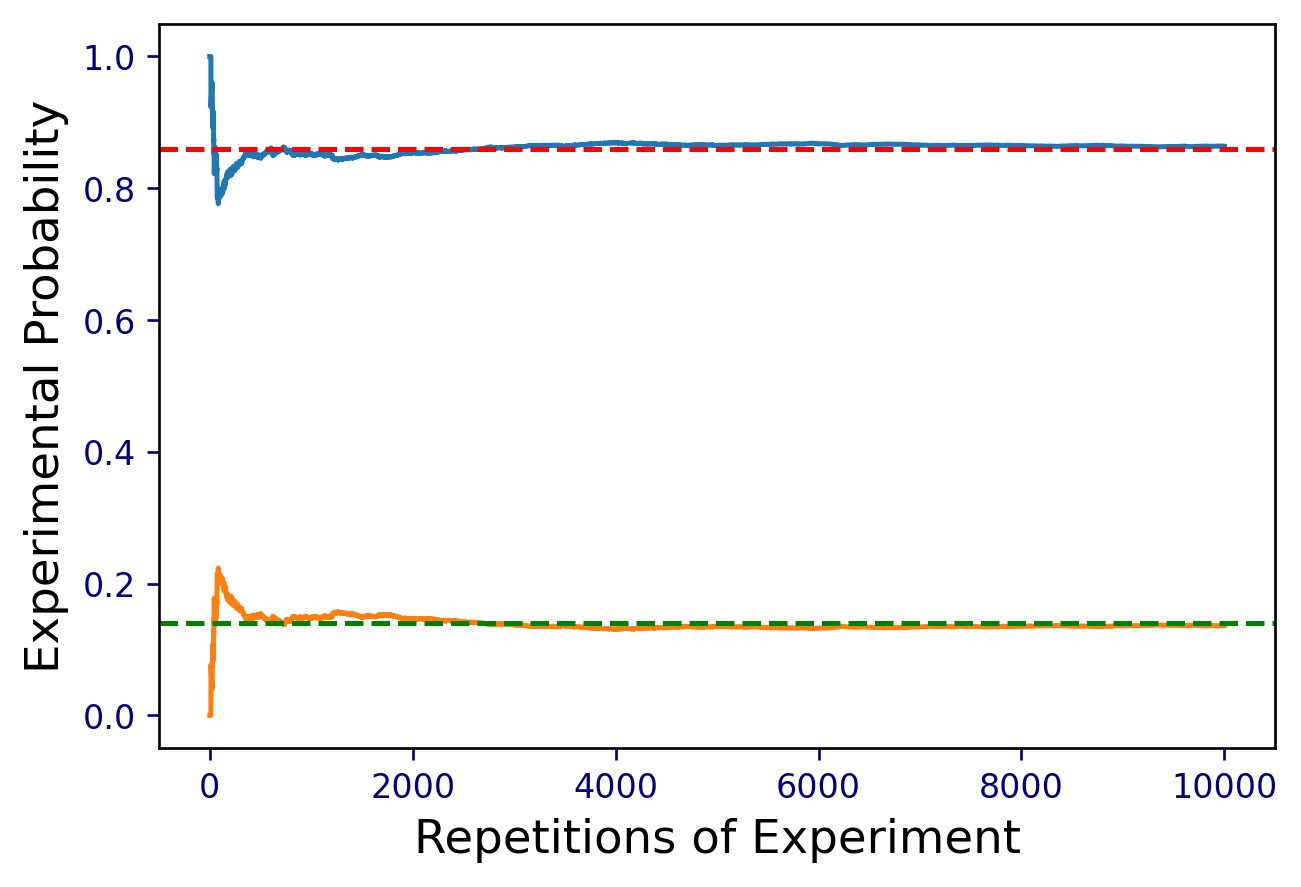

In [ ]:
runs = 10000

rainLie = 0 # Raining and at least one lie
rainLieList = []
rainTrue = 0 # Raining and they are all telling the truth
rainTrueList = []

for i in range(runs):
  friendsHalf = [np.random.random(),np.random.random()]
  friendsQuarter = [np.random.random(),np.random.random()]
  liesHalf = sum([1 for i in friendsHalf if i > 0.5])
  liesQuarter = sum([1 for i in friendsQuarter if i > 0.75])
  if (liesHalf + liesQuarter) >= 1:
    rainLie += 1
  else:
    rainTrue += 1

  rainLieList.append(rainLie/(i+1))
  rainTrueList.append(rainTrue/(i+1))

# Monte Carlo Plot
plt.plot(rainLieList)
plt.plot(rainTrueList)
plt.tick_params(axis='x', colors='navy')
plt.tick_params(axis='y', colors='navy')
plt.xlabel('Repetitions of Experiment',fontsize=14)
plt.ylabel('Experimental Probability',fontsize=14)
plt.axhline(y=0.86, color='red', linestyle='--')
plt.axhline(y=0.14, color='green', linestyle='--')


print('The odds of it raining in Boston and at least one friend lies to you:', rainLie/runs)
print('The odds of it raining in Boston and all your friends are telling the truth:', rainTrue/runs )

# **Problem 2**

2. Mad Max wants to travel from New York to Dallas by the shortest possible route. He may travel over the routes shown in the table below. Unfortunately, the Wicked Witch can block one road leading out of Atlanta and one road leading out of Nashville. Mad Max will not know which roads have been blocked until he arrives at Atlanta or Nashville. Should Mad Max start toward Atlanta or Nashville?

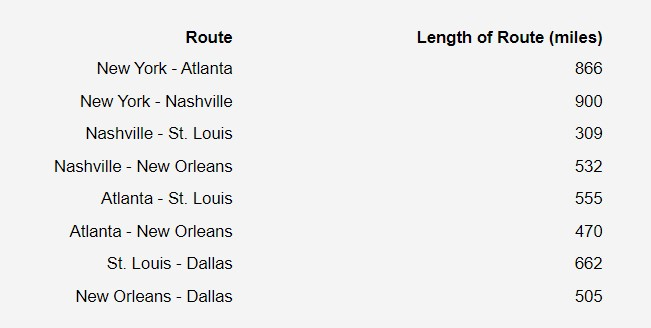


In [ ]:
distTraveledNash = []
distTraveledAtl = []
countNash = 0
countAtl = 0

runs = 10000
for i in range(runs):
  toNashville = coin_flip()
  if toNashville == 1: # Going to Nashville
    countNash += 1
    distance = 900

    WickedWitch = coin_flip()

    if WickedWitch == 1: # Wicked Witch blocks New Orleans
      distance = distance + 309 + 662
    else: # Wicked Witch blocks St. Louis
      distance = distance + 532 + 505

    distTraveledNash.append(distance)
    AvgDistanceNash = round(sum(distTraveledNash) / countNash)
  else: # Going to Atlanta
      countAtl += 1
      distance = 866

      WickedWitch = coin_flip()
      if WickedWitch == 1: # Wicked Witch blocks New Orleans
        distance = distance + 555 + 662
      else: # Wicked Witch blocks St. Louis
        distance = distance + 470 + 505
      distTraveledAtl.append(distance)
      AvgDistanceAtl = round(sum(distTraveledAtl) / countAtl)

print("Max's average distance to Dallas if he goes to Nashville is:", AvgDistanceNash, 'miles')
print("Max's average distance to Dallas if he goes to Atlanta is:", AvgDistanceAtl, 'miles' )
print()

if AvgDistanceNash > AvgDistanceAtl:
  print('Mad Max should start towards Atlanta because that route is', (AvgDistanceNash - AvgDistanceAtl), 'miles shorter' )
else:
  print('Mad Max should start towards Nashville because that route is', (AvgDistanceAtl - AvgDistanceNash), 'miles shorter' )


Max's average distance to Dallas if he goes to Nashville is: 1904 miles
Max's average distance to Dallas if he goes to Atlanta is: 1962 miles

Mad Max should start towards Nashville because that route is 58 miles shorter


# **Problem 3**

3. Simulate a population of 20000 individuals from a beta distribution that has the parametrization a=1.6 and b=2.1. Select 400 simple random samples of size 32 from this population and show that the sample means are normally distributed by using histograms, distributional plots, Quantile-Quantile plots and normality tests.


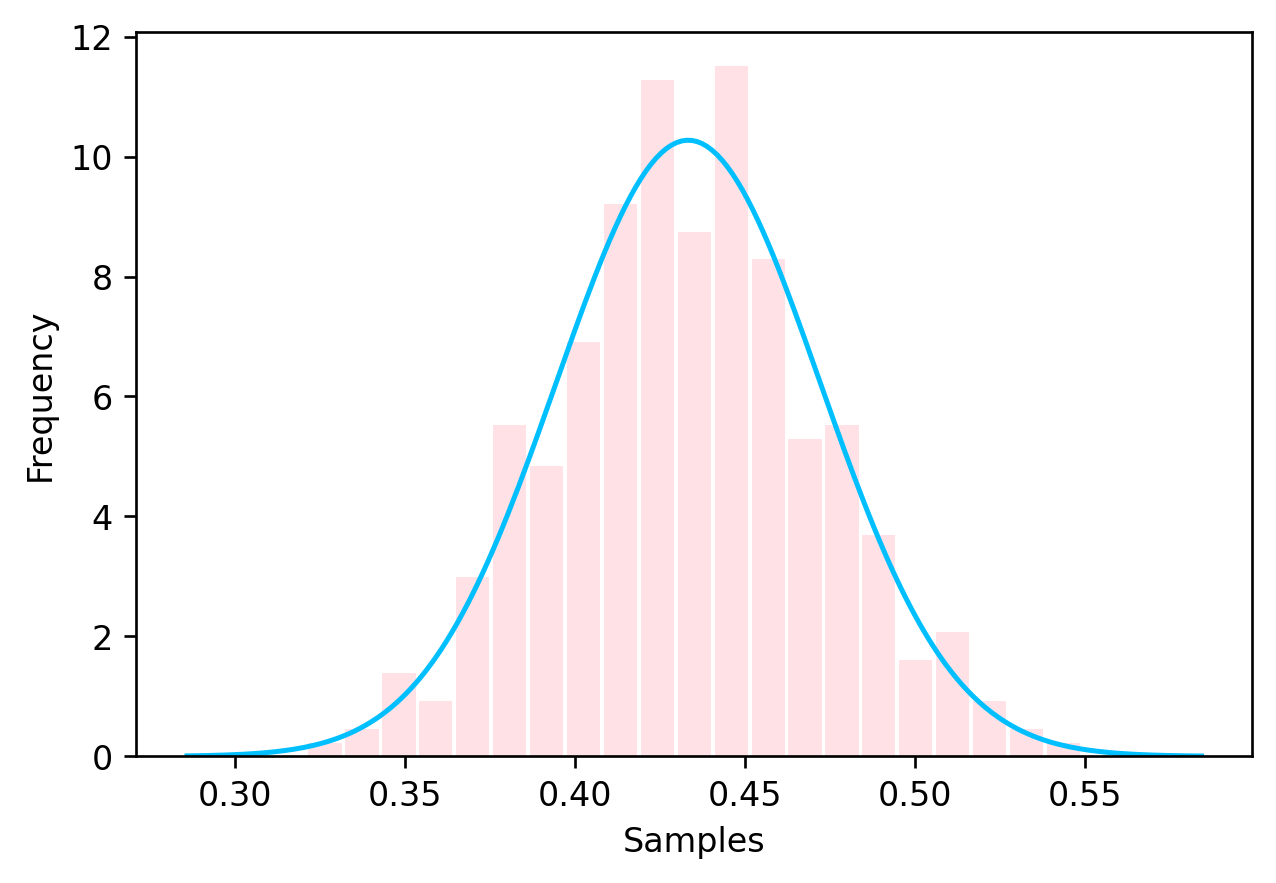

In [ ]:
betaSamples = []
data_beta = stats.beta.rvs(a=1.6,b=2.1, size=20000, random_state=123)

for a in range(400):
  meanSamples = np.mean(np.random.choice(data_beta,size=32))
  betaSamples.append(meanSamples)
ax = sns.distplot(betaSamples,
                  bins=21,
                  kde=False,
                  color='deepskyblue',
                  hist_kws={"color":'lightpink', 'rwidth':0.9},
                  fit=stats.norm,
                  fit_kws={"color":'deepskyblue'})
ax.set(xlabel='Samples', ylabel='Frequency')
plt.show()

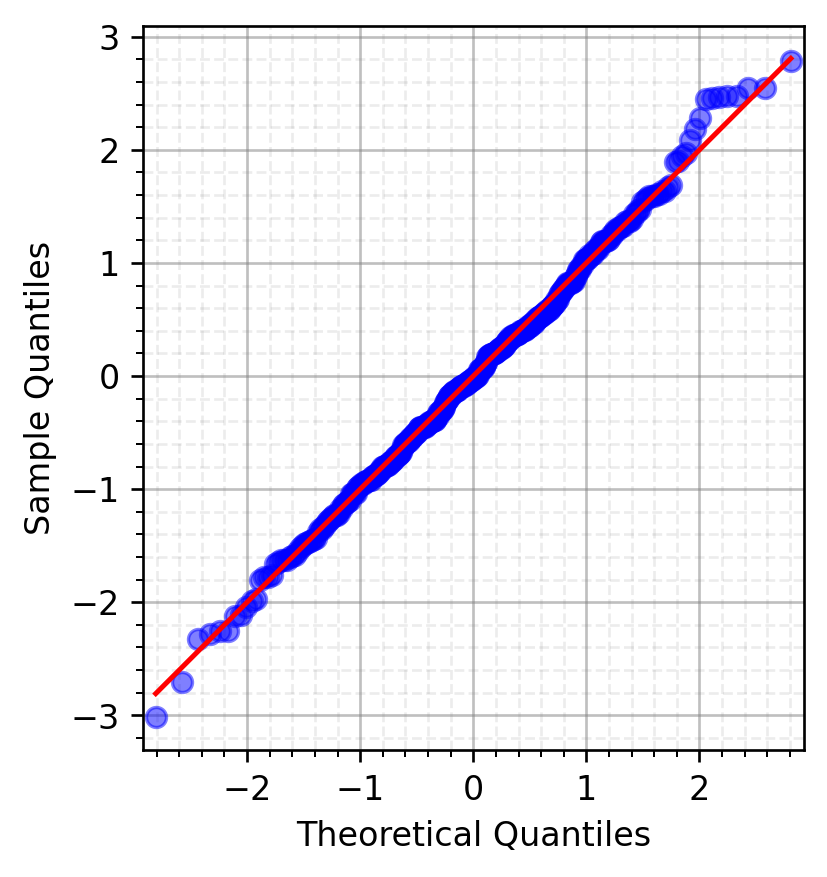

In [ ]:
sm.qqplot((betaSamples-np.mean(betaSamples))/np.std(betaSamples), line='s',alpha=0.5)
plt.axes().set_aspect('equal')
plt.grid(b=True,which='major', color ='grey', linestyle='-', alpha=0.5)
plt.grid(b=True,which='minor', color ='grey', linestyle='--', alpha=0.15)
plt.minorticks_on()
plt.show()

In [ ]:
def zscore(x):
  return ((x-np.mean(x))/np.std(x))

In [ ]:
CDF = stats.norm.cdf
def test_ks(x):
  n = len(x)
  x_sorted = np.sort(x)
  d = 0.0
  for i in range(n):
    if d < np.max([CDF(x_sorted[i])-i/n,(i+1)/n-CDF(x_sorted[i])]):
      d = np.max([CDF(x_sorted[i])-i/n,(i+1)/n-CDF(x_sorted[i])])
  return d

In [ ]:
test_ks(zscore(betaSamples)) # The answer is very close to zero so we fail to reject the null hypothesis

0.022408502526402585

In [ ]:
stats.kstest(zscore(betaSamples),'norm') # Same as above

KstestResult(statistic=0.022408502526402585, pvalue=0.9853818110469946)

In [ ]:
stats.anderson(zscore(betaSamples),'norm') # Anderson-Darling test does not have as great of results as Kolmogorov-Smirnov

AndersonResult(statistic=0.18244517541444338, critical_values=array([0.57 , 0.65 , 0.779, 0.909, 1.081]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))